# Pandas

The `numpy` module is excellent for numerical computations, but to handle missing data or arrays with mixed types takes more work. The `pandas` module is currently the most widely used tool for data manipulation, providing high-performance, easy-to-use data structures and advanced data analysis tools.

In particular `pandas` features:

* A fast and efficient "DataFrame" object for data manipulation with integrated indexing;
* Tools for reading and writing data between in-memory data structures and different formats (CSV, Excel, SQL, HDF5);
* Intelligent data alignment and integrated handling of missing data;
* Intelligent label-based slicing, fancy indexing, and subsetting of large data sets;
* Aggregating or transforming data with a powerful "group-by" engine; 
* High performance merging and joining of data sets;
* Hierarchical axis indexing provides an intuitive way of working with high-dimensional data in a lower-dimensional data structure;
* Time series-functionalities;
* Highly optimized for performance, with critical code paths written in Cython or C.


In [2]:
import pandas as pd
import numpy as np

## Series

Series are completely equivalent to 1D array but with axis labels and the possibility to store heterogeneous elements. Of paramount importance are the time-series, used to define time evolutions of a phenomenon. 


In [3]:
from string import ascii_lowercase as letters

# Creating a series, accessing indexes, values and values by their index 
xs = pd.Series(np.arange(10)*0.5, index=tuple(letters[:10]))
print ("xs:", xs,'\n')
print ("xs indexes:",xs.index,'\n')
# Values of the Series are actually a numpy array
print ("xs values:", xs.values, type(xs.values),'\n')
print (xs['f'], xs.f, xs.h, '\n')
print (xs[['d', 'f', 'h']], '\n')
print (type(xs[['d', 'f', 'h']]), '\n')

xs: a    0.0
b    0.5
c    1.0
d    1.5
e    2.0
f    2.5
g    3.0
h    3.5
i    4.0
j    4.5
dtype: float64 

xs indexes: Index(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'], dtype='object') 

xs values: [0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5] <class 'numpy.ndarray'> 

2.5 2.5 3.5 

d    1.5
f    2.5
h    3.5
dtype: float64 

<class 'pandas.core.series.Series'> 



In [4]:
# Extracting elements and operations: same as numpy array
print (xs[:3],'\n')
print (xs[7:], '\n')
print (xs[::3], '\n')
print (xs[xs>3], '\n')
print (np.exp(xs), '\n')
print (np.mean(xs), np.std(xs), '\n')

a    0.0
b    0.5
c    1.0
dtype: float64 

h    3.5
i    4.0
j    4.5
dtype: float64 

a    0.0
d    1.5
g    3.0
j    4.5
dtype: float64 

h    3.5
i    4.0
j    4.5
dtype: float64 

a     1.000000
b     1.648721
c     2.718282
d     4.481689
e     7.389056
f    12.182494
g    20.085537
h    33.115452
i    54.598150
j    90.017131
dtype: float64 

2.25 1.4361406616345072 



In [5]:
# Series can be created from python dictionary too.
# Not that the elements can be whatever!
d = {'b' : 1, 'a' : 'cat', 'c' : [2,3]}
pd.Series(d)



b         1
a       cat
c    [2, 3]
dtype: object

A key difference between Series and ndarray is that operations between Series automatically align the data based on label. Thus, you can write computations without considering whether the Series involved have the same labels.

In [6]:
s = pd.Series(np.random.randn(5), index=tuple(letters[:5]))
print(s)
s = s[1:] + s[:-1]
print(s)

a   -0.507227
b    0.029065
c    0.026313
d   -0.908845
e    0.916735
dtype: float64
a         NaN
b    0.058131
c    0.052626
d   -1.817690
e         NaN
dtype: float64


### Time series

Time series are very often used to profile the behaviour of a quantity as a function of time. Pandas has a special index for that, `DatetimeIndex`, that can be created e.g. with the function `pd.data_range()`

In [7]:
# to define a date, the datetime module is very useful
import datetime as dt
date = dt.date.today()
print(date)

date = dt.datetime(2022,11,30,10,45,10,15)
print (date)

# otherwise, several notations are interpreted too
date = 'Nov 30 2022'
# or alternatively
date = '30/11/2022 10:45:00'
print (date)

days = pd.date_range(date, periods=7, freq='D')
print (days)

seconds = pd.date_range(date, periods=3600, freq='s')
print (seconds)


2022-11-30
2022-11-30 10:45:10.000015
30/11/2022 10:45:00
DatetimeIndex(['2022-11-30 10:45:00', '2022-12-01 10:45:00',
               '2022-12-02 10:45:00', '2022-12-03 10:45:00',
               '2022-12-04 10:45:00', '2022-12-05 10:45:00',
               '2022-12-06 10:45:00'],
              dtype='datetime64[ns]', freq='D')
DatetimeIndex(['2022-11-30 10:45:00', '2022-11-30 10:45:01',
               '2022-11-30 10:45:02', '2022-11-30 10:45:03',
               '2022-11-30 10:45:04', '2022-11-30 10:45:05',
               '2022-11-30 10:45:06', '2022-11-30 10:45:07',
               '2022-11-30 10:45:08', '2022-11-30 10:45:09',
               ...
               '2022-11-30 11:44:50', '2022-11-30 11:44:51',
               '2022-11-30 11:44:52', '2022-11-30 11:44:53',
               '2022-11-30 11:44:54', '2022-11-30 11:44:55',
               '2022-11-30 11:44:56', '2022-11-30 11:44:57',
               '2022-11-30 11:44:58', '2022-11-30 11:44:59'],
              dtype='datetime64[ns]', leng

To learn more about the frequency strings, please see this [link](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases)


Timestamped data is the most basic type of time series data that associates values with points in time. For pandas objects it means using the points in time.

functions like `pd.to_datetime` can be used, for instance, when reading information as string from a dataset.

Timestamp is the pandas equivalent of python’s Datetime and is interchangeable with it in most cases. 

In [8]:
tstamp = pd.Timestamp(dt.datetime(2020, 11, 9))

# internally it counts the nanoseconds from January 1st 19
#tstamp = pd.Timestamp(dt.datetime(1970, 1, 1, 0, 0, 0, 1))
print(tstamp.value)

# when creating a timestamp the format can be explicitly passed
ts = pd.to_datetime('2010/11/12', format='%Y/%m/%d')
print (type(ts))
print (ts.value)
ts = pd.to_datetime('12-11-2010 00:00', format='%d-%m-%Y %H:%M')
print (ts)
print (ts.value)



1604880000000000000
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1289520000000000000
2010-11-12 00:00:00
1289520000000000000


A standard series can be created and (range of) elements can be used as indexes

In [9]:
tseries = pd.Series(np.random.normal(10, 1, len(days)), index=days)
# Extracting elements
print (tseries[0:4], '\n')
print (tseries['2022-11-30':'2022-12-01'], '\n') # Note - includes end time


2022-11-30 10:45:00    10.690643
2022-12-01 10:45:00     8.867750
2022-12-02 10:45:00    10.024117
2022-12-03 10:45:00     8.037698
Freq: D, dtype: float64 

2022-11-30 10:45:00    10.690643
2022-12-01 10:45:00     8.867750
Freq: D, dtype: float64 



`pd.to_datetime` can also be used to create a `DatetimeIndex`:

In [10]:
pd.to_datetime([1, 2, 3, 4], unit='D', origin=pd.Timestamp('1980-02-03'))

DatetimeIndex(['1980-02-04', '1980-02-05', '1980-02-06', '1980-02-07'], dtype='datetime64[ns]', freq=None)

## DataFrame

A pandas DataFrame is like a simple tabular spreadsheet. For future reference (or for people already familiar with R), a pandas DataFrame is very similar to the R DataFrame.

Each column in a DataFrame is a Series object.

The element can be whatever, missing data are dealt with too (as NaN)

### DataFrame creation

A DataFrame can be created implicitly, with, e.g., a DatatimeIndex object as index:

In [11]:
entries=10
dates=pd.date_range('11/30/2022 10:45:00',freq='h', periods=entries)
df = pd.DataFrame(np.random.randn(entries,4), index=dates, columns=['A','B','C','D'])
df


,A,B,C,D
2022-11-30 10:45:00,-1.946289,0.108517,0.353664,1.192110
2022-11-30 11:45:00,0.113014,1.075835,-0.478249,-0.234212
2022-11-30 12:45:00,-1.209260,-0.427295,-0.331762,1.414705
2022-11-30 13:45:00,1.237201,1.463121,0.185404,-1.623726
2022-11-30 14:45:00,0.119595,-0.854193,-0.626696,2.335331
2022-11-30 15:45:00,-1.251996,0.402634,-2.216369,1.299894
2022-11-30 16:45:00,-0.062964,0.152643,-0.636898,0.120264
2022-11-30 17:45:00,-2.415747,-1.180208,0.351243,-0.833265
2022-11-30 18:45:00,-0.917437,0.708391,0.079472,0.126874
2022-11-30 19:45:00,-0.431646,-1.890708,0.144330,0.203416


or by means of a dictionary:


In [12]:
df2 = pd.DataFrame(
    { 'A' : 1.,
      'B' : pd.Timestamp('20130102'),
      'C' : pd.Series(1,index=range(4),dtype='float32'),
      'D' : np.arange(7,11),
      'E' : pd.Categorical(["test","train","test","train"]),
    }
    )
df2

# check what happens if D and E had different lenghts 

,A,B,C,D,E
0,1.0,2013-01-02,1.0,7,test
1,1.0,2013-01-02,1.0,8,train
2,1.0,2013-01-02,1.0,9,test
3,1.0,2013-01-02,1.0,10,train


### Viewing Data

In [13]:
df.head(2)

,A,B,C,D
2022-11-30 10:45:00,-1.946289,0.108517,0.353664,1.192110
2022-11-30 11:45:00,0.113014,1.075835,-0.478249,-0.234212


In [14]:
df.tail(4)

,A,B,C,D
2022-11-30 16:45:00,-0.062964,0.152643,-0.636898,0.120264
2022-11-30 17:45:00,-2.415747,-1.180208,0.351243,-0.833265
2022-11-30 18:45:00,-0.917437,0.708391,0.079472,0.126874
2022-11-30 19:45:00,-0.431646,-1.890708,0.144330,0.203416


In [15]:
df.index

DatetimeIndex(['2022-11-30 10:45:00', '2022-11-30 11:45:00',
               '2022-11-30 12:45:00', '2022-11-30 13:45:00',
               '2022-11-30 14:45:00', '2022-11-30 15:45:00',
               '2022-11-30 16:45:00', '2022-11-30 17:45:00',
               '2022-11-30 18:45:00', '2022-11-30 19:45:00'],
              dtype='datetime64[ns]', freq='H')

In [16]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [17]:
df.values

array([[-1.94628876,  0.1085174 ,  0.35366427,  1.19211006],
       [ 0.11301387,  1.07583538, -0.47824862, -0.23421208],
       [-1.20926037, -0.42729488, -0.33176201,  1.41470483],
       [ 1.23720082,  1.46312142,  0.18540406, -1.62372617],
       [ 0.11959512, -0.85419289, -0.62669623,  2.3353312 ],
       [-1.2519955 ,  0.4026344 , -2.21636891,  1.29989404],
       [-0.06296404,  0.15264261, -0.63689762,  0.12026437],
       [-2.41574719, -1.18020801,  0.35124277, -0.83326471],
       [-0.91743673,  0.70839069,  0.07947184,  0.12687423],
       [-0.4316459 , -1.89070804,  0.1443298 ,  0.20341625]])

In [18]:
df.describe()

,A,B,C,D
count,10.000000,10.000000,10.000000,10.000000
mean,-0.676553,-0.044126,-0.317586,0.400139
std,1.088636,1.046559,0.771062,1.174853
min,-2.415747,-1.890708,-2.216369,-1.623726
25%,-1.241312,-0.747468,-0.589584,-0.145593
50%,-0.674541,0.130580,-0.126145,0.165145
75%,0.069019,0.631952,0.175135,1.272948
max,1.237201,1.463121,0.353664,2.335331


In [19]:
df.T

,2022-11-30 10:45:00,2022-11-30 11:45:00,2022-11-30 12:45:00,2022-11-30 13:45:00,2022-11-30 14:45:00,2022-11-30 15:45:00,2022-11-30 16:45:00,2022-11-30 17:45:00,2022-11-30 18:45:00,2022-11-30 19:45:00
A,-1.946289,0.113014,-1.209260,1.237201,0.119595,-1.251996,-0.062964,-2.415747,-0.917437,-0.431646
B,0.108517,1.075835,-0.427295,1.463121,-0.854193,0.402634,0.152643,-1.180208,0.708391,-1.890708
C,0.353664,-0.478249,-0.331762,0.185404,-0.626696,-2.216369,-0.636898,0.351243,0.079472,0.144330
D,1.192110,-0.234212,1.414705,-1.623726,2.335331,1.299894,0.120264,-0.833265,0.126874,0.203416


In [20]:
df.sort_index(axis=0,ascending=True)

,A,B,C,D
2022-11-30 10:45:00,-1.946289,0.108517,0.353664,1.192110
2022-11-30 11:45:00,0.113014,1.075835,-0.478249,-0.234212
2022-11-30 12:45:00,-1.209260,-0.427295,-0.331762,1.414705
2022-11-30 13:45:00,1.237201,1.463121,0.185404,-1.623726
2022-11-30 14:45:00,0.119595,-0.854193,-0.626696,2.335331
2022-11-30 15:45:00,-1.251996,0.402634,-2.216369,1.299894
2022-11-30 16:45:00,-0.062964,0.152643,-0.636898,0.120264
2022-11-30 17:45:00,-2.415747,-1.180208,0.351243,-0.833265
2022-11-30 18:45:00,-0.917437,0.708391,0.079472,0.126874
2022-11-30 19:45:00,-0.431646,-1.890708,0.144330,0.203416


In [21]:
df.sort_values(by="C")

,A,B,C,D
2022-11-30 15:45:00,-1.251996,0.402634,-2.216369,1.299894
2022-11-30 16:45:00,-0.062964,0.152643,-0.636898,0.120264
2022-11-30 14:45:00,0.119595,-0.854193,-0.626696,2.335331
2022-11-30 11:45:00,0.113014,1.075835,-0.478249,-0.234212
2022-11-30 12:45:00,-1.209260,-0.427295,-0.331762,1.414705
2022-11-30 18:45:00,-0.917437,0.708391,0.079472,0.126874
2022-11-30 19:45:00,-0.431646,-1.890708,0.144330,0.203416
2022-11-30 13:45:00,1.237201,1.463121,0.185404,-1.623726
2022-11-30 17:45:00,-2.415747,-1.180208,0.351243,-0.833265
2022-11-30 10:45:00,-1.946289,0.108517,0.353664,1.192110


## Selection

### Getting slices

The following show how to get part of the DataFrame (i.e. not just the elements)

In [22]:
## standard and safe
print (df['A'],'\n')

## equivalent but dangerous (imagine blank spaces in the name of the column..)
print (df.A)

2022-11-30 10:45:00   -1.946289
2022-11-30 11:45:00    0.113014
2022-11-30 12:45:00   -1.209260
2022-11-30 13:45:00    1.237201
2022-11-30 14:45:00    0.119595
2022-11-30 15:45:00   -1.251996
2022-11-30 16:45:00   -0.062964
2022-11-30 17:45:00   -2.415747
2022-11-30 18:45:00   -0.917437
2022-11-30 19:45:00   -0.431646
Freq: H, Name: A, dtype: float64 

2022-11-30 10:45:00   -1.946289
2022-11-30 11:45:00    0.113014
2022-11-30 12:45:00   -1.209260
2022-11-30 13:45:00    1.237201
2022-11-30 14:45:00    0.119595
2022-11-30 15:45:00   -1.251996
2022-11-30 16:45:00   -0.062964
2022-11-30 17:45:00   -2.415747
2022-11-30 18:45:00   -0.917437
2022-11-30 19:45:00   -0.431646
Freq: H, Name: A, dtype: float64


In [23]:
# selecting rows by counting
print (df[0:3])

# or by index
print (df["2022-11-30 10:45:00":"2022-11-30 12:45:00"])

                            A         B         C         D
2022-11-30 10:45:00 -1.946289  0.108517  0.353664  1.192110
2022-11-30 11:45:00  0.113014  1.075835 -0.478249 -0.234212
2022-11-30 12:45:00 -1.209260 -0.427295 -0.331762  1.414705
                            A         B         C         D
2022-11-30 10:45:00 -1.946289  0.108517  0.353664  1.192110
2022-11-30 11:45:00  0.113014  1.075835 -0.478249 -0.234212
2022-11-30 12:45:00 -1.209260 -0.427295 -0.331762  1.414705


### Selection by label

In [24]:
# getting a cross section (part of the DataFrame) using a label
df.loc[dates[0]]

A   -1.946289
B    0.108517
C    0.353664
D    1.192110
Name: 2022-11-30 10:45:00, dtype: float64

In [25]:
# selecting on a multi-axis by label:
df.loc[:,['A','B']]
#a=df.loc[:,['A','B']]

,A,B
2022-11-30 10:45:00,-1.946289,0.108517
2022-11-30 11:45:00,0.113014,1.075835
2022-11-30 12:45:00,-1.209260,-0.427295
2022-11-30 13:45:00,1.237201,1.463121
2022-11-30 14:45:00,0.119595,-0.854193
2022-11-30 15:45:00,-1.251996,0.402634
2022-11-30 16:45:00,-0.062964,0.152643
2022-11-30 17:45:00,-2.415747,-1.180208
2022-11-30 18:45:00,-0.917437,0.708391
2022-11-30 19:45:00,-0.431646,-1.890708


In [26]:
# showing label slicing, both endpoints are included:
df.loc['2022-11-30 14:45:00':'2022-11-30 16:45:00',['A','B']]

,A,B
2022-11-30 14:45:00,0.119595,-0.854193
2022-11-30 15:45:00,-1.251996,0.402634
2022-11-30 16:45:00,-0.062964,0.152643


In [27]:
# getting an individual element
print (df.loc[dates[1],'A'])

# equivalently
print (df.at[dates[1],'A'])

0.1130138704560783
0.1130138704560783


### Selecting by position

In [28]:
# select via the position of the passed integers:
print (df.iloc[3],'\n')

# notation similar to numpy/python
print (df.iloc[3:5,0:2])

A    1.237201
B    1.463121
C    0.185404
D   -1.623726
Name: 2022-11-30 13:45:00, dtype: float64 

                            A         B
2022-11-30 13:45:00  1.237201  1.463121
2022-11-30 14:45:00  0.119595 -0.854193


In [29]:
# selecting raws 1,2 and 4 for columns 0 and 2
df.iloc[[1,2,4],[0,2]]

,A,C
2022-11-30 11:45:00,0.113014,-0.478249
2022-11-30 12:45:00,-1.209260,-0.331762
2022-11-30 14:45:00,0.119595,-0.626696


In [30]:
# slicing rows explicitly
print (df.iloc[1:3,:],'\n')

# slicing columns explicitly
print (df.iloc[:,1:3])


                            A         B         C         D
2022-11-30 11:45:00  0.113014  1.075835 -0.478249 -0.234212
2022-11-30 12:45:00 -1.209260 -0.427295 -0.331762  1.414705 

                            B         C
2022-11-30 10:45:00  0.108517  0.353664
2022-11-30 11:45:00  1.075835 -0.478249
2022-11-30 12:45:00 -0.427295 -0.331762
2022-11-30 13:45:00  1.463121  0.185404
2022-11-30 14:45:00 -0.854193 -0.626696
2022-11-30 15:45:00  0.402634 -2.216369
2022-11-30 16:45:00  0.152643 -0.636898
2022-11-30 17:45:00 -1.180208  0.351243
2022-11-30 18:45:00  0.708391  0.079472
2022-11-30 19:45:00 -1.890708  0.144330


In [31]:
# selecting an individual element by position
print(df.iloc[1,1])
print(df.iat[1,1])


1.0758353812295969
1.0758353812295969


### Boolean index

Very powerful way of filtering out data with certain features. Notation is very similar to numpy arrays.

In [32]:
# Filter by a boolean condition on the values of a single column
df[df['B'] > 0]

,A,B,C,D
2022-11-30 10:45:00,-1.946289,0.108517,0.353664,1.192110
2022-11-30 11:45:00,0.113014,1.075835,-0.478249,-0.234212
2022-11-30 13:45:00,1.237201,1.463121,0.185404,-1.623726
2022-11-30 15:45:00,-1.251996,0.402634,-2.216369,1.299894
2022-11-30 16:45:00,-0.062964,0.152643,-0.636898,0.120264
2022-11-30 18:45:00,-0.917437,0.708391,0.079472,0.126874


In [33]:
# Selecting on the basis of boolean conditions applied to the whole DataFrame
df[df>0]

# a DataFrame with the same shape is returned, with NaN's where condition is not met

,A,B,C,D
2022-11-30 10:45:00,NaN,0.108517,0.353664,1.192110
2022-11-30 11:45:00,0.113014,1.075835,NaN,NaN
2022-11-30 12:45:00,NaN,NaN,NaN,1.414705
2022-11-30 13:45:00,1.237201,1.463121,0.185404,NaN
2022-11-30 14:45:00,0.119595,NaN,NaN,2.335331
2022-11-30 15:45:00,NaN,0.402634,NaN,1.299894
2022-11-30 16:45:00,NaN,0.152643,NaN,0.120264
2022-11-30 17:45:00,NaN,NaN,0.351243,NaN
2022-11-30 18:45:00,NaN,0.708391,0.079472,0.126874
2022-11-30 19:45:00,NaN,NaN,0.144330,0.203416


### Setting

Combination of selection and setting of values

In [34]:
# setting values by label (same as by position)
df.at[dates[0],'A'] = 0

# setting and assigning a numpy array
df.loc[:,'D'] = np.array([5] * len(df))

# defining a brend new column
df['E'] = np.arange(len(df))*0.5

# defining a brend new column by means of a pd.Series: indexes must be the same!
df['E prime'] = pd.Series(np.arange(len(df))*2, index=df.index)


In [35]:
def dcos(theta):
    theta = theta*(np.pi/180)
    return np.cos(theta)
 
df['cosine'] = pd.Series(df["E"].apply(dcos), index=df.index)
df

,A,B,C,D,E,E prime,cosine
2022-11-30 10:45:00,0.000000,0.108517,0.353664,5,0.0,0,1.000000
2022-11-30 11:45:00,0.113014,1.075835,-0.478249,5,0.5,2,0.999962
2022-11-30 12:45:00,-1.209260,-0.427295,-0.331762,5,1.0,4,0.999848
2022-11-30 13:45:00,1.237201,1.463121,0.185404,5,1.5,6,0.999657
2022-11-30 14:45:00,0.119595,-0.854193,-0.626696,5,2.0,8,0.999391
2022-11-30 15:45:00,-1.251996,0.402634,-2.216369,5,2.5,10,0.999048
2022-11-30 16:45:00,-0.062964,0.152643,-0.636898,5,3.0,12,0.998630
2022-11-30 17:45:00,-2.415747,-1.180208,0.351243,5,3.5,14,0.998135
2022-11-30 18:45:00,-0.917437,0.708391,0.079472,5,4.0,16,0.997564
2022-11-30 19:45:00,-0.431646,-1.890708,0.144330,5,4.5,18,0.996917


In [36]:
# another example of global setting
df2=df.copy()

df2[df2>0] = -df2
df2

,A,B,C,D,E,E prime,cosine
2022-11-30 10:45:00,0.000000,-0.108517,-0.353664,-5,0.0,0,-1.000000
2022-11-30 11:45:00,-0.113014,-1.075835,-0.478249,-5,-0.5,-2,-0.999962
2022-11-30 12:45:00,-1.209260,-0.427295,-0.331762,-5,-1.0,-4,-0.999848
2022-11-30 13:45:00,-1.237201,-1.463121,-0.185404,-5,-1.5,-6,-0.999657
2022-11-30 14:45:00,-0.119595,-0.854193,-0.626696,-5,-2.0,-8,-0.999391
2022-11-30 15:45:00,-1.251996,-0.402634,-2.216369,-5,-2.5,-10,-0.999048
2022-11-30 16:45:00,-0.062964,-0.152643,-0.636898,-5,-3.0,-12,-0.998630
2022-11-30 17:45:00,-2.415747,-1.180208,-0.351243,-5,-3.5,-14,-0.998135
2022-11-30 18:45:00,-0.917437,-0.708391,-0.079472,-5,-4.0,-16,-0.997564
2022-11-30 19:45:00,-0.431646,-1.890708,-0.144330,-5,-4.5,-18,-0.996917


In [37]:
df

,A,B,C,D,E,E prime,cosine
2022-11-30 10:45:00,0.000000,0.108517,0.353664,5,0.0,0,1.000000
2022-11-30 11:45:00,0.113014,1.075835,-0.478249,5,0.5,2,0.999962
2022-11-30 12:45:00,-1.209260,-0.427295,-0.331762,5,1.0,4,0.999848
2022-11-30 13:45:00,1.237201,1.463121,0.185404,5,1.5,6,0.999657
2022-11-30 14:45:00,0.119595,-0.854193,-0.626696,5,2.0,8,0.999391
2022-11-30 15:45:00,-1.251996,0.402634,-2.216369,5,2.5,10,0.999048
2022-11-30 16:45:00,-0.062964,0.152643,-0.636898,5,3.0,12,0.998630
2022-11-30 17:45:00,-2.415747,-1.180208,0.351243,5,3.5,14,0.998135
2022-11-30 18:45:00,-0.917437,0.708391,0.079472,5,4.0,16,0.997564
2022-11-30 19:45:00,-0.431646,-1.890708,0.144330,5,4.5,18,0.996917


### Dropping

N.B.: dropping doesn't act permanently on the DataFrame, i.e. to get that do :
```python
df = df.drop(....)
```

In [38]:
# Dropping by column
df.drop(['E prime'], axis=1)

#which is equivalent to
new_df=df.drop(columns=['E prime'])
new_df

,A,B,C,D,E,cosine
2022-11-30 10:45:00,0.000000,0.108517,0.353664,5,0.0,1.000000
2022-11-30 11:45:00,0.113014,1.075835,-0.478249,5,0.5,0.999962
2022-11-30 12:45:00,-1.209260,-0.427295,-0.331762,5,1.0,0.999848
2022-11-30 13:45:00,1.237201,1.463121,0.185404,5,1.5,0.999657
2022-11-30 14:45:00,0.119595,-0.854193,-0.626696,5,2.0,0.999391
2022-11-30 15:45:00,-1.251996,0.402634,-2.216369,5,2.5,0.999048
2022-11-30 16:45:00,-0.062964,0.152643,-0.636898,5,3.0,0.998630
2022-11-30 17:45:00,-2.415747,-1.180208,0.351243,5,3.5,0.998135
2022-11-30 18:45:00,-0.917437,0.708391,0.079472,5,4.0,0.997564
2022-11-30 19:45:00,-0.431646,-1.890708,0.144330,5,4.5,0.996917


In [39]:
# Dropping by raws
# safe and always working
df.drop(df.index[[1,2,3,4]])

,A,B,C,D,E,E prime,cosine
2022-11-30 10:45:00,0.000000,0.108517,0.353664,5,0.0,0,1.000000
2022-11-30 15:45:00,-1.251996,0.402634,-2.216369,5,2.5,10,0.999048
2022-11-30 16:45:00,-0.062964,0.152643,-0.636898,5,3.0,12,0.998630
2022-11-30 17:45:00,-2.415747,-1.180208,0.351243,5,3.5,14,0.998135
2022-11-30 18:45:00,-0.917437,0.708391,0.079472,5,4.0,16,0.997564
2022-11-30 19:45:00,-0.431646,-1.890708,0.144330,5,4.5,18,0.996917


In [40]:
df

,A,B,C,D,E,E prime,cosine
2022-11-30 10:45:00,0.000000,0.108517,0.353664,5,0.0,0,1.000000
2022-11-30 11:45:00,0.113014,1.075835,-0.478249,5,0.5,2,0.999962
2022-11-30 12:45:00,-1.209260,-0.427295,-0.331762,5,1.0,4,0.999848
2022-11-30 13:45:00,1.237201,1.463121,0.185404,5,1.5,6,0.999657
2022-11-30 14:45:00,0.119595,-0.854193,-0.626696,5,2.0,8,0.999391
2022-11-30 15:45:00,-1.251996,0.402634,-2.216369,5,2.5,10,0.999048
2022-11-30 16:45:00,-0.062964,0.152643,-0.636898,5,3.0,12,0.998630
2022-11-30 17:45:00,-2.415747,-1.180208,0.351243,5,3.5,14,0.998135
2022-11-30 18:45:00,-0.917437,0.708391,0.079472,5,4.0,16,0.997564
2022-11-30 19:45:00,-0.431646,-1.890708,0.144330,5,4.5,18,0.996917


In [41]:
# something like df.drop('index_name') 
# would work but the type of index must be specificed, 
# in particular with DatetimeIndex
df.drop(pd.to_datetime("2022-11-30 18:45:00"))

,A,B,C,D,E,E prime,cosine
2022-11-30 10:45:00,0.000000,0.108517,0.353664,5,0.0,0,1.000000
2022-11-30 11:45:00,0.113014,1.075835,-0.478249,5,0.5,2,0.999962
2022-11-30 12:45:00,-1.209260,-0.427295,-0.331762,5,1.0,4,0.999848
2022-11-30 13:45:00,1.237201,1.463121,0.185404,5,1.5,6,0.999657
2022-11-30 14:45:00,0.119595,-0.854193,-0.626696,5,2.0,8,0.999391
2022-11-30 15:45:00,-1.251996,0.402634,-2.216369,5,2.5,10,0.999048
2022-11-30 16:45:00,-0.062964,0.152643,-0.636898,5,3.0,12,0.998630
2022-11-30 17:45:00,-2.415747,-1.180208,0.351243,5,3.5,14,0.998135
2022-11-30 19:45:00,-0.431646,-1.890708,0.144330,5,4.5,18,0.996917


## Missing data

pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations.

In [42]:
df_wNan = df[df>0]
df_wNan

,A,B,C,D,E,E prime,cosine
2022-11-30 10:45:00,NaN,0.108517,0.353664,5,NaN,NaN,1.000000
2022-11-30 11:45:00,0.113014,1.075835,NaN,5,0.5,2.0,0.999962
2022-11-30 12:45:00,NaN,NaN,NaN,5,1.0,4.0,0.999848
2022-11-30 13:45:00,1.237201,1.463121,0.185404,5,1.5,6.0,0.999657
2022-11-30 14:45:00,0.119595,NaN,NaN,5,2.0,8.0,0.999391
2022-11-30 15:45:00,NaN,0.402634,NaN,5,2.5,10.0,0.999048
2022-11-30 16:45:00,NaN,0.152643,NaN,5,3.0,12.0,0.998630
2022-11-30 17:45:00,NaN,NaN,0.351243,5,3.5,14.0,0.998135
2022-11-30 18:45:00,NaN,0.708391,0.079472,5,4.0,16.0,0.997564
2022-11-30 19:45:00,NaN,NaN,0.144330,5,4.5,18.0,0.996917


In [43]:
# dropping raws with at least a Nan
df_wNan.dropna(how='any')

,A,B,C,D,E,E prime,cosine
2022-11-30 13:45:00,1.237201,1.463121,0.185404,5,1.5,6.0,0.999657


In [44]:
# getting a mask
df_wNan.isna()
#df_wNan.notna()

,A,B,C,D,E,E prime,cosine
2022-11-30 10:45:00,True,False,False,False,True,True,False
2022-11-30 11:45:00,False,False,True,False,False,False,False
2022-11-30 12:45:00,True,True,True,False,False,False,False
2022-11-30 13:45:00,False,False,False,False,False,False,False
2022-11-30 14:45:00,False,True,True,False,False,False,False
2022-11-30 15:45:00,True,False,True,False,False,False,False
2022-11-30 16:45:00,True,False,True,False,False,False,False
2022-11-30 17:45:00,True,True,False,False,False,False,False
2022-11-30 18:45:00,True,False,False,False,False,False,False
2022-11-30 19:45:00,True,True,False,False,False,False,False


In [45]:
# filling missing data
df_wNan.fillna(value=0)

,A,B,C,D,E,E prime,cosine
2022-11-30 10:45:00,0.000000,0.108517,0.353664,5,0.0,0.0,1.000000
2022-11-30 11:45:00,0.113014,1.075835,0.000000,5,0.5,2.0,0.999962
2022-11-30 12:45:00,0.000000,0.000000,0.000000,5,1.0,4.0,0.999848
2022-11-30 13:45:00,1.237201,1.463121,0.185404,5,1.5,6.0,0.999657
2022-11-30 14:45:00,0.119595,0.000000,0.000000,5,2.0,8.0,0.999391
2022-11-30 15:45:00,0.000000,0.402634,0.000000,5,2.5,10.0,0.999048
2022-11-30 16:45:00,0.000000,0.152643,0.000000,5,3.0,12.0,0.998630
2022-11-30 17:45:00,0.000000,0.000000,0.351243,5,3.5,14.0,0.998135
2022-11-30 18:45:00,0.000000,0.708391,0.079472,5,4.0,16.0,0.997564
2022-11-30 19:45:00,0.000000,0.000000,0.144330,5,4.5,18.0,0.996917


Fill gaps forward or backward by propagating non-NA values forward or backward:

In [46]:
df_wNan.fillna(method='pad')

,A,B,C,D,E,E prime,cosine
2022-11-30 10:45:00,NaN,0.108517,0.353664,5,NaN,NaN,1.000000
2022-11-30 11:45:00,0.113014,1.075835,0.353664,5,0.5,2.0,0.999962
2022-11-30 12:45:00,0.113014,1.075835,0.353664,5,1.0,4.0,0.999848
2022-11-30 13:45:00,1.237201,1.463121,0.185404,5,1.5,6.0,0.999657
2022-11-30 14:45:00,0.119595,1.463121,0.185404,5,2.0,8.0,0.999391
2022-11-30 15:45:00,0.119595,0.402634,0.185404,5,2.5,10.0,0.999048
2022-11-30 16:45:00,0.119595,0.152643,0.185404,5,3.0,12.0,0.998630
2022-11-30 17:45:00,0.119595,0.152643,0.351243,5,3.5,14.0,0.998135
2022-11-30 18:45:00,0.119595,0.708391,0.079472,5,4.0,16.0,0.997564
2022-11-30 19:45:00,0.119595,0.708391,0.144330,5,4.5,18.0,0.996917


## Operations

Here comes the most relevant advantage of DataFrame. Operations on columns are extremly fast, almost as fast as the actual operation between elements in a raw

In [47]:
# Some statistics (mean() just as an example)
# raws
print (df.mean(axis=0),'\n')
# columns
print (df.mean(axis=1),'\n')

A         -0.481924
B         -0.044126
C         -0.317586
D          5.000000
E          2.250000
E prime    9.000000
cosine     0.998915
dtype: float64 

2022-11-30 10:45:00    0.923169
2022-11-30 11:45:00    1.315795
2022-11-30 12:45:00    1.290219
2022-11-30 13:45:00    2.340769
2022-11-30 14:45:00    2.091157
2022-11-30 15:45:00    2.204760
2022-11-30 16:45:00    2.921630
2022-11-30 17:45:00    2.893346
2022-11-30 18:45:00    3.695427
2022-11-30 19:45:00    3.759842
Freq: H, dtype: float64 



In [48]:
# global operations on columns
df.apply(np.cumsum)

,A,B,C,D,E,E prime,cosine
2022-11-30 10:45:00,0.000000,0.108517,0.353664,5,0.0,0,1.000000
2022-11-30 11:45:00,0.113014,1.184353,-0.124584,10,0.5,2,1.999962
2022-11-30 12:45:00,-1.096247,0.757058,-0.456346,15,1.5,6,2.999810
2022-11-30 13:45:00,0.140954,2.220179,-0.270942,20,3.0,12,3.999467
2022-11-30 14:45:00,0.260549,1.365986,-0.897639,25,5.0,20,4.998858
2022-11-30 15:45:00,-0.991446,1.768621,-3.114007,30,7.5,30,5.997906
2022-11-30 16:45:00,-1.054410,1.921263,-3.750905,35,10.5,42,6.996536
2022-11-30 17:45:00,-3.470157,0.741055,-3.399662,40,14.0,56,7.994670
2022-11-30 18:45:00,-4.387594,1.449446,-3.320190,45,18.0,72,8.992234
2022-11-30 19:45:00,-4.819240,-0.441262,-3.175861,50,22.5,90,9.989152


In [49]:
df

,A,B,C,D,E,E prime,cosine
2022-11-30 10:45:00,0.000000,0.108517,0.353664,5,0.0,0,1.000000
2022-11-30 11:45:00,0.113014,1.075835,-0.478249,5,0.5,2,0.999962
2022-11-30 12:45:00,-1.209260,-0.427295,-0.331762,5,1.0,4,0.999848
2022-11-30 13:45:00,1.237201,1.463121,0.185404,5,1.5,6,0.999657
2022-11-30 14:45:00,0.119595,-0.854193,-0.626696,5,2.0,8,0.999391
2022-11-30 15:45:00,-1.251996,0.402634,-2.216369,5,2.5,10,0.999048
2022-11-30 16:45:00,-0.062964,0.152643,-0.636898,5,3.0,12,0.998630
2022-11-30 17:45:00,-2.415747,-1.180208,0.351243,5,3.5,14,0.998135
2022-11-30 18:45:00,-0.917437,0.708391,0.079472,5,4.0,16,0.997564
2022-11-30 19:45:00,-0.431646,-1.890708,0.144330,5,4.5,18,0.996917


In [50]:
df.apply(lambda x: x.max() - x.min())

A           3.652948
B           3.353829
C           2.570033
D           0.000000
E           4.500000
E prime    18.000000
cosine      0.003083
dtype: float64

In [51]:
# syntax is as usual similar to that of numpy arrays
df['A']+df['B']

2022-11-30 10:45:00    0.108517
2022-11-30 11:45:00    1.188849
2022-11-30 12:45:00   -1.636555
2022-11-30 13:45:00    2.700322
2022-11-30 14:45:00   -0.734598
2022-11-30 15:45:00   -0.849361
2022-11-30 16:45:00    0.089679
2022-11-30 17:45:00   -3.595955
2022-11-30 18:45:00   -0.209046
2022-11-30 19:45:00   -2.322354
Freq: H, dtype: float64

Let's play it hard and load (in memory) a (relatively) large dataset

In [52]:
# WARNING! link in past notebook was wrong!, (if needed) get the right file from:
#!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ~/data/

file_name="~/data/data_000637.txt"
data=pd.read_csv(file_name)
data

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25
...,...,...,...,...,...,...
1310715,1,0,62,3869211171,762,14
1310716,1,1,4,3869211171,763,11
1310717,1,0,64,3869211171,764,0
1310718,1,0,139,3869211171,769,0


Let's now do some operations among (elements of) columns

In [53]:
# the one-liner killing it all
data['timens']=data['TDC_MEAS']*25/30+data['BX_COUNTER']*25

In [54]:
data['timens']

0          59371.666667
1          59372.500000
2          63848.333333
3          63965.833333
4          69020.833333
               ...     
1310715    19061.666667
1310716    19084.166667
1310717    19100.000000
1310718    19225.000000
1310719    19065.000000
Name: timens, Length: 1310720, dtype: float64

In [55]:
# the old slooow way
def conversion(data):
    result=[]
    for i in range(len(data)): 
        result.append(data.loc[data.index[i],'TDC_MEAS']*25/30.+data.loc[data.index[i],'BX_COUNTER']*25)
    return result

data['timens']=conversion(data)

KeyboardInterrupt: 

## Merge

pandas provides various facilities for easily combining together Series, DataFrame, and Panel objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

### Concat

concatenation (adding rows) is straightforward


In [56]:
rdf = pd.DataFrame(np.random.randn(10, 4))
rdf

,0,1,2,3
0,0.144860,-0.222375,0.503493,-1.038319
1,-0.297915,0.742433,0.627326,-0.772526
2,-0.018806,0.143557,-1.182597,-0.280025
3,0.955196,0.762311,0.246005,1.424034
4,0.151415,0.344953,0.121186,-0.294100
5,0.770620,1.327257,0.556289,-0.262698
6,2.097812,-0.076279,0.567697,-1.539368
7,-0.567427,0.990376,-0.107093,-0.203611
8,0.900638,-0.796481,0.462205,0.622863
9,0.218948,0.152425,-0.114726,0.426857


In [57]:
# divide it into pieaces raw-wise
pieces = [rdf[:3], rdf[3:7], rdf[7:]]
pieces

[          0         1         2         3
 0  0.144860 -0.222375  0.503493 -1.038319
 1 -0.297915  0.742433  0.627326 -0.772526
 2 -0.018806  0.143557 -1.182597 -0.280025,
           0         1         2         3
 3  0.955196  0.762311  0.246005  1.424034
 4  0.151415  0.344953  0.121186 -0.294100
 5  0.770620  1.327257  0.556289 -0.262698
 6  2.097812 -0.076279  0.567697 -1.539368,
           0         1         2         3
 7 -0.567427  0.990376 -0.107093 -0.203611
 8  0.900638 -0.796481  0.462205  0.622863
 9  0.218948  0.152425 -0.114726  0.426857]

In [58]:
# put it back together
#pd.concat(pieces)

# indexes can be ignored
pd.concat(pieces, ignore_index=True)

# in case of dimension mismatch, Nan are added where needed

,0,1,2,3
0,0.144860,-0.222375,0.503493,-1.038319
1,-0.297915,0.742433,0.627326,-0.772526
2,-0.018806,0.143557,-1.182597,-0.280025
3,0.955196,0.762311,0.246005,1.424034
4,0.151415,0.344953,0.121186,-0.294100
5,0.770620,1.327257,0.556289,-0.262698
6,2.097812,-0.076279,0.567697,-1.539368
7,-0.567427,0.990376,-0.107093,-0.203611
8,0.900638,-0.796481,0.462205,0.622863
9,0.218948,0.152425,-0.114726,0.426857


In [59]:
# appending a single row (as a Series)
s = rdf.iloc[3]
rdf.append(s, ignore_index=True)
rdf

,0,1,2,3
0,0.144860,-0.222375,0.503493,-1.038319
1,-0.297915,0.742433,0.627326,-0.772526
2,-0.018806,0.143557,-1.182597,-0.280025
3,0.955196,0.762311,0.246005,1.424034
4,0.151415,0.344953,0.121186,-0.294100
5,0.770620,1.327257,0.556289,-0.262698
6,2.097812,-0.076279,0.567697,-1.539368
7,-0.567427,0.990376,-0.107093,-0.203611
8,0.900638,-0.796481,0.462205,0.622863
9,0.218948,0.152425,-0.114726,0.426857


### Merge/Join

SQL like operations on table can be performed on DataFrames. This is all rather sophisticated, refer to the [doc](https://pandas.pydata.org/pandas-docs/stable/merging.html#merging) for more info/examples

In [60]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
print(left)
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})
print(right)
pd.merge(left,right,on="key")

   key  lval
0  foo     1
1  bar     2
   key  rval
0  foo     4
1  bar     5


,key,lval,rval
0,foo,1,4
1,bar,2,5


## Grouping

By “group by” we are referring to a process involving one or more of the following steps:

* Splitting the data into groups based on some criteria
* Applying a function to each group independently
* Combining the results into a data structure


In [61]:
gdf = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                    'B' : ['one', 'one', 'two', 'three',
                           'two', 'two', 'one', 'three'],
                    'C' : np.random.randn(8),
                    'D' : np.random.randn(8)})
gdf

,A,B,C,D
0,foo,one,-1.219676,-0.613638
1,bar,one,1.217873,0.700678
2,foo,two,0.041473,-0.359915
3,bar,three,-0.794771,0.444896
4,foo,two,0.176914,1.044434
5,bar,two,-0.826313,-0.306380
6,foo,one,0.155168,-0.335664
7,foo,three,0.286740,0.373610


In [62]:
# Grouping and then applying the sum() 
# function to the resulting groups (effective only where number are there).
gdf.groupby('A').sum()

,C,D
A,,
bar,-0.403211,0.839194
foo,-0.559380,0.108827


## Multi-indexing


Hierarchical / Multi-level indexing allows sophisticated data analysis on higher dimensional data. In essence, it enables you to store and manipulate data with an arbitrary number of dimensions in lower dimensional data structures like Series (1d) and DataFrame (2d).

In [ ]:
tuples = list(zip(['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
          ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']))
multi_index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
print (multi_index,'\n')

s = pd.Series(np.random.randn(8), index=multi_index)
print (s)


In [ ]:
# it enables further features of the groupby method,
# e.g. when group-by by multiple columns
gdf.groupby(['A','B']).sum()

In [ ]:
# stack() method “compresses” a level in the DataFrame’s columns
gdf.groupby(['A','B']).sum().stack()

## Plotting

Just a preview, more on the next lab class!

<AxesSubplot:>

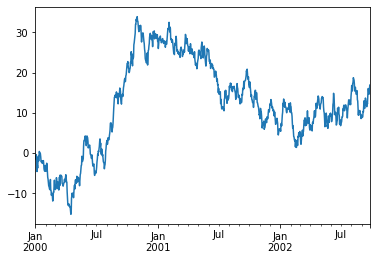

In [63]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts.cumsum().plot()

<Figure size 432x288 with 0 Axes>

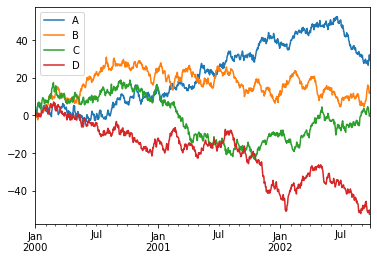

In [64]:
import matplotlib.pyplot as plt

pdf=pd.DataFrame(np.random.randn(1000, 4), index=ts.index,columns=['A', 'B', 'C', 'D'])
pdf = pdf.cumsum()
plt.figure(); pdf.plot(); plt.legend(loc='best')